In [26]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
#import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.arima_model import ARIMA

In [27]:

df = pd.read_csv(r'C:\Users\SOLOMON\Desktop\wendel\Kaggle\US_Shootings.csv')
df.head(10)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [28]:

#Check for nulls
for col in df.columns:
    print(col, str(round(100* df[col].isnull().sum() / len(df), 2)) + '%')

id 0.0%
name 0.0%
date 0.0%
manner_of_death 0.0%
armed 0.0%
age 0.0%
gender 0.0%
race 0.0%
city 0.0%
state 0.0%
signs_of_mental_illness 0.0%
threat_level 0.0%
flee 0.0%
body_camera 0.0%
arms_category 0.0%


In [29]:
#Feature Engineering
df["date"] = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.weekday
df['month'] = df['date'].dt.month
df['month_day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [30]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,weekday,month,month_day,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,4,1,2,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,4,1,2,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,5,1,3,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,6,1,4,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,6,1,4,2015


In [45]:
#Visualization of Manner of Death
labels = ['Shot','shot and Tasered']
colors = ('blue','red')
#Visualization of Manner of Death
data = df['manner_of_death'].value_counts().reset_index()
data.columns = ['manner_of_death', 'count']
fig = px.pie(data, values='count', names='manner_of_death', title='Manner of death', width=500, height=400,hole = 0.2,color = colors)
fig.show()

In [48]:
#Visualization of Weapons Used
data = df['armed'].value_counts().reset_index()
data.columns = ['Weapon', 'count']
data = data.sort_values('count')
fig = px.bar(data.tail(20), x='count', y='Weapon', orientation='h', title='Weapons Used', width=500, height=600,color = 'count')
fig.show()

In [54]:

#Visualization of Age distribution
fig = px.histogram(df, "age", nbins=20, title = 'Shootings by Age distribution', width=800,color = 'gender')
fig.show()

In [58]:
#Violin Graph of Age
fig = go.Figure(data=go.Violin(y=df['age'], x0='Age',fillcolor = 'yellowgreen'))
fig.show()

In [63]:
#Visualisation of gender distribution
colors = ('deep blue','yellow')
data = df['gender'].value_counts().reset_index()
data.columns = ['gender', 'count']
fig = px.bar(data, x='count', y='gender', orientation='h', title='Gender distribution', width=700, height=400,color = 'count')
fig.show()

In [66]:
#visualisation of race distribution
data = df['race'].value_counts().reset_index()
data.columns = ['race', 'count']
fig = px.bar(data, x='count', y='race', orientation='h', title='Race distribution', width=800)
fig.show()

In [70]:
#Visualisation of Shootings by State
city = df.groupby('state')['name'].count().reset_index().sort_values('name', ascending=True).tail(20)
fig = px.bar(city, x="name", y="state", orientation='h',title="Shootings by State", width=800, height=700,color = 'state')
fig.show()

In [73]:
#Deaths by Day of the Week
data = df.groupby(['weekday'])['name'].count().reset_index()
data.columns = ['weekday', 'count']
fig = px.bar(data, x='weekday', y='count', orientation='v', title='Shooting by Day of week', width=600)
fig.show()

In [77]:
# Death by Months of the Year
data = df.groupby(['month'])['name'].count().reset_index()
data.columns = ['month', 'count']
fig = px.bar(data, x='month', y='count', orientation='v', title='Month of year', width=800,color = 'count')
fig.show()

In [78]:
#Coversion of date to month
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,weekday,month,month_day,year,month_year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,5,1,3,2015,2015-01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,6,1,4,2015,2015-01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,6,1,4,2015,2015-01


In [127]:
#Death by month_year
data = df.groupby(['month_year'])['name'].count().reset_index()
data.columns = ['month_year', 'count']
data['month_year'] = data['month_year'].astype(str)
fig = px.bar(data, x='month_year', y='count', orientation='v', title='Deaths by months', width=800,color = 'month_year')
fig.show()

In [82]:
#Escape Distribution
data = df.groupby(['flee'])['name'].count().reset_index()
data.columns = ['flee', 'count']
fig = px.pie(data, values='count', names='flee', title='Flee distribution', width=600,color = 'flee')
fig.show()

In [90]:
Innocent = df['flee'] =='Not fleeing'

In [91]:
Innocent_data = df[Innocent]

In [92]:
Innocent_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,weekday,month,month_day,year,month_year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,5,1,3,2015,2015-01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,6,1,4,2015,2015-01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,6,1,4,2015,2015-01


In [113]:
Analysis = Innocent_data.groupby('race')['name'].count().reset_index()
Analysis.columns = ['race','counts']
Fig = px.pie(Analysis,values = 'counts',names = 'race',title = 'Race of Innocent Shot Victims')
Fig.show()

In [114]:
data = Innocent_data.groupby('state')['name'].count().reset_index()
data.columns = ['state','counts']
#data.head()

,state,counts
0,AK,18
1,AL,58
2,AR,51
3,AZ,144
4,CA,445


In [119]:
Fig = px.bar(data,x = 'state',y='counts',title = 'Shootings by State (People who did not attempt to flee)',color = 'state')
Fig.show()

In [125]:
gender = Innocent_data.groupby('gender')['name'].count().reset_index()
gender.columns = ['gender','counts']
plot = px.bar(gender, x='gender',y = 'counts',title = 'By Gender')
plot.show()

In [132]:
#Using ARIMA Model to predic deaths by Month
data = df.groupby(['month_year'])['name'].count().reset_index()
data.columns = ['month_year', 'count']
data['month_year'] = data['month_year'].astype(str)
data = data.head(65)
fig = px.line(data, x="month_year", y="count", title='Deaths month by month')
fig.show()


In [129]:
model = ARIMA(data['count'], order=(3,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                   64
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -248.364
Method:                       css-mle   S.D. of innovations             11.309
Date:                Tue, 01 Sep 2020   AIC                            508.728
Time:                        13:39:59   BIC                            521.681
Sample:                             1   HQIC                           513.830
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1943      0.063     -3.080      0.002      -0.318      -0.071
ar.L1.D.count     0.0427      0.125      0.341      0.733      -0.203       0.288
ar.L2.D.count    -0.1492      0.123     

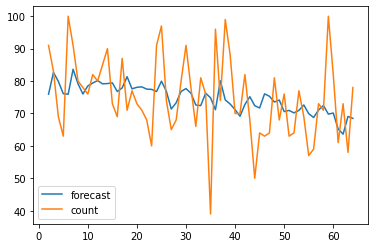

In [133]:
model_fit.plot_predict(dynamic=False)
plt.show()


In [141]:
#Deaths MoM with predictions
preds, _, _ = model_fit.forecast(19, alpha=0.05)
preds = preds.tolist()
preds = [int(item) for item in preds]
months = ['2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', 
          '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', 
          '2021-10', '2021-11', '2021-12']

In [142]:
new_df = pd.DataFrame()
new_df['month_year'] = months
new_df['count'] = preds
data = pd.concat([data, new_df])

fig = px.line(data, x="month_year", y="count", title='Deaths month by month with predictions')
fig.show()

In [145]:
print('Thanks for your time \n \n Wendel Amoo')

Thanks for your time 
 
 Wendel Amoo
